Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'seaborn'

Reading the dataset

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Checking for null values

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
le = LabelEncoder()
data = df.apply(le.fit_transform)

Splitting the dataset into 5 random samples

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=333)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=123)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=456)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=789)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.2, random_state=987)

Oversampling the data

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto')

In [ ]:
X_train1_resampled, y_train1_resampled = oversampler.fit_resample(X_train1, y_train1)
X_train2_resampled, y_train2_resampled = oversampler.fit_resample(X_train2, y_train2)
X_train3_resampled, y_train3_resampled = oversampler.fit_resample(X_train3, y_train3)
X_train4_resampled, y_train4_resampled = oversampler.fit_resample(X_train4, y_train4)
X_train5_resampled, y_train5_resampled = oversampler.fit_resample(X_train5, y_train5)

Classifiers

1) Naive Bayes

In [ ]:
# bagging_classifier = BaggingClassifier()
# bagging_classifier.fit(X_train1_resampled, y_train1_resampled)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train1_resampled, y_train1_resampled)

2) Treeclassifier

In [ ]:
#adaboost = AdaBoostClassifier()
# adaboost.fit(X_train2_resampled, y_train2_resampled)

In [ ]:
from sklearn import tree
nb = tree.DecisionTreeClassifier().fit(X_train2_resampled, y_train2_resampled)

3) RandomForest

In [ ]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train3_resampled, y_train3_resampled)

RandomForestClassifier()

4) GradientBoost

In [ ]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train4_resampled, y_train4_resampled)

GradientBoostingClassifier()

5) XGBoost

In [ ]:
xgboost_classifier = XGBClassifier(n_estimators=100)
xgboost_classifier.fit(X_train5_resampled, y_train5_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Ensemble Model

In [ ]:
models = [('GaussianNB', nb),
          ('TreeClassifier', clf),
          ('RandomForest', randomforest),
          ('GradientBoost', gradient_boosting),
          ('XGBoost', xgboost_classifier)]

ensemble_model = VotingClassifier(estimators=models, voting='hard')
ensemble_model.fit(X_train3_resampled, y_train3_resampled)

VotingClassifier(estimators=[('GaussianNB', DecisionTreeClassifier()),
                             ('TreeClassifier', GaussianNB()),
                             ('RandomForest', RandomForestClassifier()),
                             ('GradientBoost', GradientBoostingClassifier()),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stoppi...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

Testing the model

In [ ]:
y_pred = ensemble_model.predict(X_test2)

Accuracy Score

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 96.75324675324676%


Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test2, y_pred)
print(cm)

[[93  3]
 [ 2 56]]


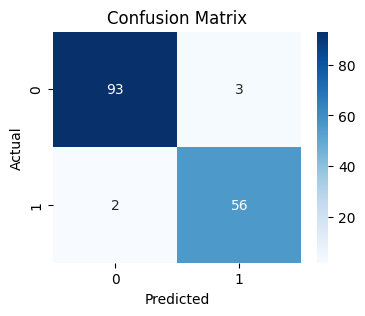

In [ ]:
cm = confusion_matrix(y_test2,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test2, y_pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test2, y_pred))
print('F1 Score: %.3f' % f1_score(y_test2, y_pred))

Precision: 0.968
Recall: 0.966
F1 Score: 0.957
